### Исследование алгоритмов классификации на шуме

### Create dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
clmn = ('c' + str(x) for x in range(50))
data = np.random.rand(1001,51)
X = pd.DataFrame(data=data[1:,1:], index=range(1000), columns=clmn)

In [3]:
X.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.495159,0.507739,0.489919,0.493342,0.503475,0.480637,0.506286,0.486152,0.499659,0.492897,...,0.501214,0.497883,0.503219,0.487789,0.511463,0.513544,0.498594,0.490249,0.507802,0.495058
std,0.290440,0.289173,0.286056,0.290650,0.293575,0.295887,0.296671,0.285386,0.295611,0.287114,...,0.291491,0.288385,0.295124,0.287585,0.289146,0.287231,0.290432,0.286008,0.285329,0.296564
min,0.000233,0.003092,0.002679,0.000489,0.000605,0.001164,0.000596,0.000223,0.002428,0.001945,...,0.000175,0.000137,0.001944,0.000446,0.000915,0.000275,0.001451,0.001995,0.000914,0.000223
25%,0.250223,0.261941,0.235696,0.236084,0.248887,0.212959,0.237196,0.241563,0.233493,0.239726,...,0.235009,0.247863,0.258051,0.237096,0.259977,0.276323,0.247438,0.234642,0.258781,0.238314
50%,0.485482,0.513715,0.495841,0.491392,0.495361,0.465150,0.506460,0.483935,0.497596,0.488875,...,0.508663,0.493127,0.494876,0.479087,0.518122,0.528033,0.489634,0.504559,0.517722,0.498396
75%,0.749099,0.762160,0.728934,0.751391,0.771148,0.741390,0.764461,0.735670,0.759545,0.740724,...,0.756669,0.763647,0.767173,0.736789,0.759268,0.756505,0.771072,0.726292,0.746002,0.748635
max,0.998825,0.999520,0.997742,0.995178,0.998832,0.998708,0.999891,0.999170,0.999281,0.999649,...,0.998753,0.998678,0.997524,0.999769,0.999439,0.997923,0.997852,0.999478,0.999831,0.999059


In [4]:
y = np.random.randint(low = 0, high = 2, size =(1000,))

In [5]:
unique, counts = np.unique(y, return_counts=True)
print(f'{unique[0]} >> {counts[0]}')
print(f'{unique[1]} >> {counts[1]}')

0 >> 522
1 >> 478


### Train-test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

## Train and evaluate

In [7]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# clf = DecisionTreeClassifier()
# clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, max_features=.5)
# clf = RandomForestClassifier(n_estimators=100, random_state=1)
# clf = XGBClassifier()
# clf = SVC()
# clf = KNeighborsClassifier()

In [9]:
# XGBoost
XGB_clf = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
XGB_clf.fit(X_train, y_train, eval_metric="error", eval_set=eval_set)

[0]	validation_0-error:0.398667	validation_1-error:0.552
[1]	validation_0-error:0.378667	validation_1-error:0.536
[2]	validation_0-error:0.38	validation_1-error:0.536
[3]	validation_0-error:0.368	validation_1-error:0.536
[4]	validation_0-error:0.344	validation_1-error:0.564
[5]	validation_0-error:0.305333	validation_1-error:0.52
[6]	validation_0-error:0.294667	validation_1-error:0.528
[7]	validation_0-error:0.278667	validation_1-error:0.516
[8]	validation_0-error:0.250667	validation_1-error:0.496
[9]	validation_0-error:0.24	validation_1-error:0.488
[10]	validation_0-error:0.230667	validation_1-error:0.5
[11]	validation_0-error:0.214667	validation_1-error:0.5
[12]	validation_0-error:0.22	validation_1-error:0.512
[13]	validation_0-error:0.221333	validation_1-error:0.516
[14]	validation_0-error:0.206667	validation_1-error:0.516
[15]	validation_0-error:0.206667	validation_1-error:0.528
[16]	validation_0-error:0.201333	validation_1-error:0.512
[17]	validation_0-error:0.185333	validation_1-e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
results = XGB_clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

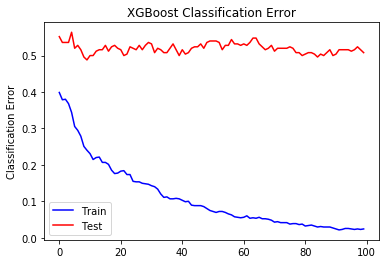

In [21]:
#plot results
from matplotlib import pyplot

fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], 'b', label='Train')
ax.plot(x_axis, results['validation_1']['error'], 'r', label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [12]:
# DecisionTreeClassifier

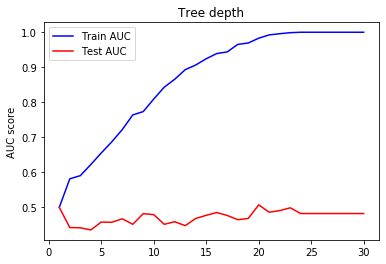

In [13]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
    dt_clf.fit(X_train, y_train)
    train_pred = dt_clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt_clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib import pyplot

fig, ax = pyplot.subplots()
ax.plot(max_depths, train_results, 'b', label='Train AUC')
ax.plot(max_depths, test_results, 'r', label='Test AUC')
ax.legend()
pyplot.ylabel('AUC score')
pyplot.title('Tree depth')
pyplot.show()

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score

print("roc_auc %.3f" % roc_auc_score(y_test, y_pred))
print("recall %.3f" % recall_score(y_test, y_pred))
print("accuracy %.3f" % accuracy_score(y_test, y_pred))

roc_auc 0.482
recall 0.442
accuracy 0.484


In [15]:
# DecisionTreeClassifier
# roc_auc 0.467
# recall 0.443
# accuracy 0.468

In [16]:
# BaggingClassifier
# roc_auc 0.509
# recall 0.377
# accuracy 0.512

In [17]:
# RandomForestClassifier
# roc_auc 0.482
# recall 0.410
# accuracy 0.484

In [18]:
# XGBClassifier
# roc_auc 0.523
# recall 0.467
# accuracy 0.524

In [19]:
# Support Vector Machines
# roc_auc 0.520
# recall 0.172
# accuracy 0.528

In [20]:
# KNN
# roc_auc 0.430
# recall 0.352
# accuracy 0.432

### Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
params = {
    'eta': np.linspace(0,1,11),
    'min_child_weight': np.linspace(1,10,51),
    'alpha': np.linspace(0,2,21),
    'max_depth': np.arange(1,11,1),  
}

In [33]:
rcv = RandomizedSearchCV(estimator=XGB_clf,
                        param_distributions=params,
                        cv=3,
                        n_iter=12,
                        n_jobs=-1,
                        random_state=1,
                        scoring="roc_auc")

In [40]:
rcv.fit(X_train, y_train);

In [41]:
model = rcv.best_estimator_

In [42]:
y_pred = model.predict(X_test)

In [43]:
model

XGBClassifier(alpha=1.7000000000000002, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.6000000000000001, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=1, min_child_weight=4.24,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [44]:
print("roc_auc %.3f" % roc_auc_score(y_test, y_pred))
print("recall %.3f" % recall_score(y_test, y_pred))
print("accuracy %.3f" % accuracy_score(y_test, y_pred))

roc_auc 0.465
recall 0.400
accuracy 0.468


__without tuning__
- roc_auc 0.519
- recall 0.480
- accuracy 0.520